In [1]:
# 단순보 + 임의 위치 집중하중 (P @ a)
P = 20.0   # kN
L = 6.0    # m
a = 2.0    # m (왼쪽 지점에서 하중 위치)

# 반력
RA = P * (L - a) / L
RB = P * a / L

print(f"P={P} kN, L={L} m, a={a} m")
print(f"RA={RA:.3f} kN, RB={RB:.3f} kN")


P=20.0 kN, L=6.0 m, a=2.0 m
RA=13.333 kN, RB=6.667 kN


In [2]:
n = 400
x_list, V_list, M_list = [], [], []

M_max = -1e30
x_Mmax = 0.0

for i in range(n + 1):
    x = L * i / n
    x_list.append(x)

    # 전단력 V(x)
    if x < a:
        V = RA
    elif x > a:
        V = RA - P
    else:  # x == a (점프 지점)
        V = 0.0
    V_list.append(V)

    # 휨모멘트 M(x)
    if x <= a:
        M = RA * x
    else:
        M = RA * x - P * (x - a)
    M_list.append(M)

    # 최대 모멘트 추적
    if M > M_max:
        M_max = M
        x_Mmax = x

print(f"Mmax ≈ {M_max:.3f} kN·m at x ≈ {x_Mmax:.3f} m")


Mmax ≈ 26.600 kN·m at x ≈ 1.995 m


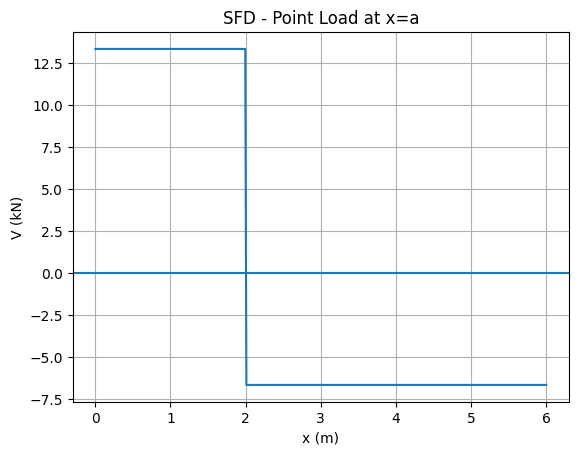

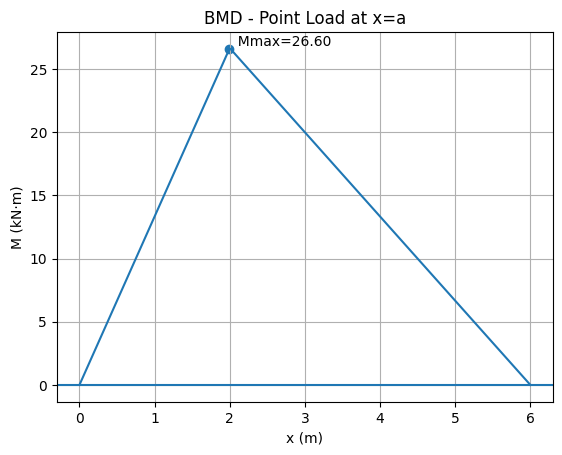

In [3]:
import matplotlib.pyplot as plt

# SFD
plt.figure()
plt.plot(x_list, V_list)
plt.axhline(0)
plt.title("SFD - Point Load at x=a")
plt.xlabel("x (m)")
plt.ylabel("V (kN)")
plt.grid(True)

# BMD
plt.figure()
plt.plot(x_list, M_list)
plt.axhline(0)
plt.title("BMD - Point Load at x=a")
plt.xlabel("x (m)")
plt.ylabel("M (kN·m)")
plt.grid(True)

# 최대 모멘트 표시
plt.scatter([x_Mmax], [M_max])
plt.text(x_Mmax, M_max, f"  Mmax={M_max:.2f}", va="bottom")

plt.show()
